# Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import json
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth,SpotifyClientCredentials
import yaml
import re
from tqdm import tqdm
import multiprocessing as mp
import time
import random
import datetime
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from skimage import io
from sklearn.preprocessing import OneHotEncoder

C:\bigdata\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df=pd.read_csv("1M_unique_processed_data.csv")

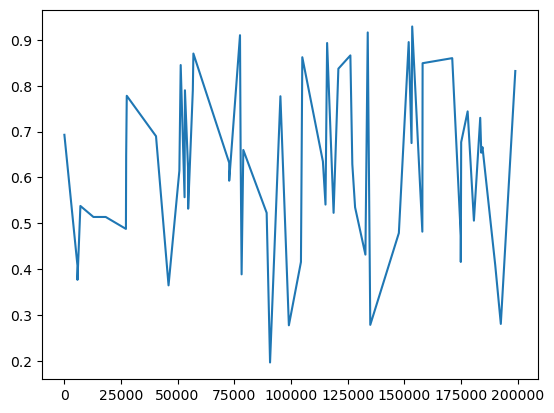

In [3]:
plt.plot(df['energy'][df["danceability"]==0.9])  #df[df['danceability']>0.8]

In [4]:
df

,track_uri,artist_uri,album_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Track_release_date,Track_pop,Artist_pop,Artist_genres
0,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,6vV5UrXcfyQD1wu4Qo2I9K,0.904,0.813,4.0,-7.105,0.0,0.1210,0.0311,0.006970,0.0471,0.810,125.461,226864.0,4.0,40,14,13,dance_pop hip_hop hip_pop neo_soul pop_rap r&b...
1,3jagJCUbdqhDSPuxP8cAqF,2wIVse2owClT7go1WT98tk,6DeU398qrJ1bLuryetSmup,0.884,0.677,1.0,-5.603,1.0,0.2830,0.0778,0.000000,0.0732,0.584,101.868,263227.0,4.0,40,14,13,dance_pop hip_hop hip_pop neo_soul pop_rap r&b...
2,3XplJgPz8VjbDzbGwGgZdq,2wIVse2owClT7go1WT98tk,6epR3D622KWsnuHye7ApOl,0.794,0.805,0.0,-6.554,1.0,0.2300,0.5380,0.122000,0.0952,0.658,177.799,236933.0,4.0,40,8,13,dance_pop hip_hop hip_pop neo_soul pop_rap r&b...
3,0jG92AlXau21qgCQRxGLic,2wIVse2owClT7go1WT98tk,20t54K6C80QQH7vbcpfJcP,0.622,0.669,9.0,-8.419,1.0,0.3290,0.0266,0.000003,0.1520,0.570,93.839,252987.0,4.0,40,11,13,dance_pop hip_hop hip_pop neo_soul pop_rap r&b...
4,6zsk6uF3MxfIeHPlubKBvR,2wIVse2owClT7go1WT98tk,20t54K6C80QQH7vbcpfJcP,0.797,0.750,0.0,-9.369,1.0,0.2470,0.5330,0.108000,0.0950,0.740,177.870,211120.0,4.0,40,14,13,dance_pop hip_hop hip_pop neo_soul pop_rap r&b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199487,1v5cWpIeZy9b7dcnTLSBfJ,0RtuQJxIFrArfCSP1SE8b1,69DQLvSvNKZXGz2o8owzKA,0.658,0.793,10.0,-7.035,0.0,0.0354,0.0163,0.000000,0.1390,0.645,102.102,200825.0,4.0,40,0,0,unknown
199488,2hMgtSwuabFeFBy4vwrJMh,2Vk5UCbhAwHkm0sUhz6E1I,5id1ZkpCcye4DNzmzJ4XCZ,0.583,0.917,7.0,-3.835,0.0,0.0510,0.0224,0.000000,0.3340,0.845,101.966,238386.0,4.0,40,0,0,unknown
199489,697fRdgcVTADfDD7sOvksM,6YeoDFCyhnPGVz5vat8Y82,0YLh2ruepdGPf6geIU4D9J,0.701,0.535,8.0,-10.012,1.0,0.0327,0.8350,0.000046,0.1150,0.944,99.895,159121.0,4.0,40,0,1,unknown
199490,76bxv7Z4tMB9SouHePAKnA,0cSJoJvUx2b8uZidslkw8B,3DyTWTDk0TfgePCE5iIA7H,0.706,0.561,7.0,-6.570,1.0,0.2690,0.8710,0.000000,0.1090,0.836,130.175,241013.0,4.0,40,2,4,slam_poetry


In [5]:
df.columns

Index(['track_uri', 'artist_uri', 'album_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'Track_release_date', 'Track_pop', 'Artist_pop', 'Artist_genres'],
      dtype='object')

In [6]:
df_mod=df.drop(['Artist_genres','duration_ms' ],axis=1)

In [7]:
df_mod.describe

<bound method NDFrame.describe of                      track_uri              artist_uri  \
0       0UaMYEvWZi0ZqiDOoHU3YI  2wIVse2owClT7go1WT98tk   
1       3jagJCUbdqhDSPuxP8cAqF  2wIVse2owClT7go1WT98tk   
2       3XplJgPz8VjbDzbGwGgZdq  2wIVse2owClT7go1WT98tk   
3       0jG92AlXau21qgCQRxGLic  2wIVse2owClT7go1WT98tk   
4       6zsk6uF3MxfIeHPlubKBvR  2wIVse2owClT7go1WT98tk   
...                        ...                     ...   
199487  1v5cWpIeZy9b7dcnTLSBfJ  0RtuQJxIFrArfCSP1SE8b1   
199488  2hMgtSwuabFeFBy4vwrJMh  2Vk5UCbhAwHkm0sUhz6E1I   
199489  697fRdgcVTADfDD7sOvksM  6YeoDFCyhnPGVz5vat8Y82   
199490  76bxv7Z4tMB9SouHePAKnA  0cSJoJvUx2b8uZidslkw8B   
199491  0tsfD8TFkM3W4jCvqc58os  3nXMZsj1H0F7h9SDUeYNjg   

                     album_uri  danceability  energy   key  loudness  mode  \
0       6vV5UrXcfyQD1wu4Qo2I9K         0.904   0.813   4.0    -7.105   0.0   
1       6DeU398qrJ1bLuryetSmup         0.884   0.677   1.0    -5.603   1.0   
2       6epR3D622KWsnuHye7ApOl     

In [8]:
df_mod.to_csv("sql_full_data.csv",index=False)

In [9]:
import seaborn as sns

In [10]:
df_new=df.drop(['track_uri', 'artist_uri', 'album_uri','Artist_genres','Track_release_date','duration_ms','time_signature'],axis=1)
# df_new=df_new.r[:2000]

In [11]:
df_new.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Track_pop,Artist_pop
count,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000,199492.000000
mean,0.567603,0.618908,5.249799,-8.313687,0.659395,0.089608,0.290860,0.130381,0.203058,0.469934,120.953794,3.707773,9.024848
std,0.173274,0.241795,3.576157,4.612043,0.473914,0.105199,0.319041,0.281327,0.179003,0.254360,29.402225,4.021783,4.088208
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.455000,0.455000,2.000000,-10.082000,0.000000,0.034800,0.019700,0.000000,0.096300,0.261000,97.897000,0.000000,6.000000
50%,0.579000,0.656000,5.000000,-7.177000,1.000000,0.047300,0.145000,0.000042,0.128000,0.456000,120.133000,3.000000,10.000000
75%,0.695000,0.817000,8.000000,-5.268000,1.000000,0.090300,0.523000,0.025200,0.256000,0.671000,139.929250,7.000000,12.000000
max,0.990000,1.000000,11.000000,3.744000,1.000000,0.965000,0.996000,1.000000,1.000000,0.999000,247.963000,18.000000,20.000000


In [24]:
df_new=df_new.sample(n=2500, random_state=42)

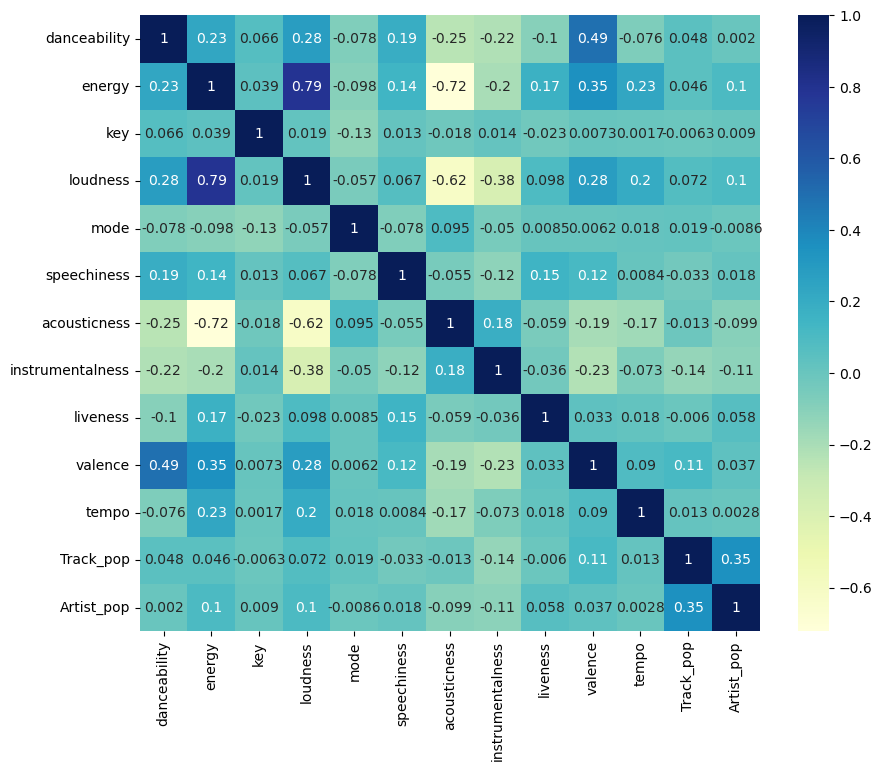

In [30]:
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

<Axes: >

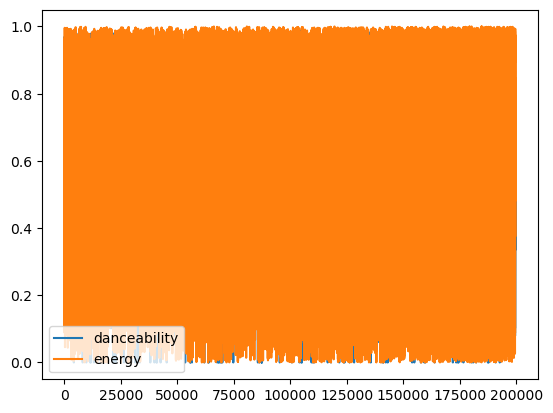

In [6]:
df[['danceability', 'energy']].plot()

acousticness

In [36]:
ac=df_mod[df_mod['acousticness']>0.80]

In [37]:
ac=ac[['track_uri','artist_uri','album_uri','acousticness','danceability']]

In [39]:
print([x for x in ac["track_uri"][1000:1011]])

['4dP1sRpWqTyFhRHxgQ0Xex', '7mvdhntvpqCRCHTJmpBHjT', '3DQ2xziy3kufEhlryCTp2J', '4pwv5OLEGroP3jrMUxsYcH', '5BKyCxijVZnHhxWOrifg6T', '5vQgvJJlp5stNNkDmM1CB8', '1Xf95xgHlO9nXXOeG2UTZN', '1m5eFhE34yyYv2lkjtcKPG', '1AI1ni3LpTJ4DKRr69fBqw', '7pOcnni0UFajywUyhQhFHC', '3DCXvt8p5JCQJhrVkzb92e']


danceability

In [64]:
de=df_mod[df_mod['danceability']>0.95]

In [65]:
de=de[['track_uri','artist_uri','album_uri','acousticness','danceability']]

In [66]:
de

,track_uri,artist_uri,album_uri,acousticness,danceability
14,3GhuNU58hVUuzKY7LHmFRB,2wIVse2owClT7go1WT98tk,20t54K6C80QQH7vbcpfJcP,0.1400,0.969
331,0O45fw2L5vsWpdsOdXwNAR,31TPClRtHm23RisEBtV3X7,2scB1uhcCI1TSf6b9TCZK3,0.0584,0.967
1051,0KJ0CwNDO83xxvm4Sepcs2,1yxSLGMDHlW21z4YXirZDS,4wBDclsxFzGnR4kVAAMI7K,0.0441,0.955
4768,3XVozq1aeqsJwpXrEZrDJ9,7GXXMm3DB1VswVcuGyInUd,20O6lfaDAoMhUj5TAvVbb6,0.0025,0.979
4769,11d9oUiwHuYt216EFA2tiz,7GXXMm3DB1VswVcuGyInUd,1LHacvoBTd7o2d7wwQ9EZD,0.0270,0.980
...,...,...,...,...,...
194520,3slbzXDxifAHcMe5GHaiI3,2pVurQy6iuWWx707gilSdX,3Ala0LAHgjBlpCNoK4MgMn,0.3050,0.961
194854,41P1Fg36WklXXiOWkY1Ncq,1IsVHJuhzJJ9DDnB3mvthC,3bekz0mQaTWA5RdZ65thMt,0.0519,0.953
197094,2NX3r2qizmeTedOcIsM7eE,6j7dDxM89fhqCqxHfVzEKS,5dVXWBwVx7s98D0bY0Guzd,0.3110,0.973
197479,0vKjShB6AjFwi6jYPkVzYM,4xwUgNqFoEqdtNZIAdZDAw,1DctqEmix7qlw2m8gUizUa,0.5780,0.962


In [77]:
result = df_mod.query("acousticness > 0.989 or danceability > 0.93 or valence > 0.93 or speechiness > 0.9 or instrumentalness>0.9")

In [78]:
result

,track_uri,artist_uri,album_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Track_release_date,Track_pop,Artist_pop
6,7IAa7vUJ11STN7le8XaxsH,2wIVse2owClT7go1WT98tk,5F4BPEd7S8ZNZetT2fiMwO,0.932,0.819,8.0,-3.484,0.0,0.2030,0.0181,0.000007,0.0577,0.556,119.941,4.0,40,10,13
14,3GhuNU58hVUuzKY7LHmFRB,2wIVse2owClT7go1WT98tk,20t54K6C80QQH7vbcpfJcP,0.969,0.701,1.0,-7.503,1.0,0.1560,0.1400,0.001610,0.2010,0.905,121.392,4.0,40,10,13
44,2KOiFW6fVTnBMwP6kIG7Yz,2wIVse2owClT7go1WT98tk,6UkdyvPElK6JDkyeRClbI2,0.883,0.659,5.0,-8.600,0.0,0.2780,0.1590,0.000013,0.0771,0.966,74.987,4.0,39,7,13
45,6y1HxKKNY5iNqie88XiWl4,2wIVse2owClT7go1WT98tk,6UkdyvPElK6JDkyeRClbI2,0.889,0.556,6.0,-10.240,1.0,0.1070,0.1910,0.947000,0.0881,0.969,110.733,4.0,39,6,13
47,0hq4njfuLWfjlfinVFCXhA,2wIVse2owClT7go1WT98tk,6UkdyvPElK6JDkyeRClbI2,0.887,0.378,0.0,-10.435,0.0,0.0588,0.0711,0.015300,0.1000,0.941,132.018,4.0,39,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199469,2SIbbv6uM29EpOVqGhp1Ix,2gXilRulLO72ChGGj98I3z,105UHcx1NrFdsmuleAbJWo,0.632,0.977,11.0,-3.405,0.0,0.0399,0.4670,0.000000,0.4220,0.959,91.332,4.0,40,2,0
199473,2UySQB8Qpp8fcRWIkCMdoX,1N5VmB4brseItjgPvteOTE,3rDlK4s0zrZSx1B3RvFaDf,0.790,0.910,8.0,-3.653,1.0,0.0539,0.5450,0.000000,0.3690,0.962,98.021,4.0,40,0,7
199483,23vSgcEZOIv6RUmg4TVW2z,6P6FzomDMeM5mwj5AHBaWl,2FqVUGvBrQOKOEXG0XtY75,0.741,0.911,5.0,-4.166,0.0,0.0326,0.3070,0.000000,0.7080,0.932,121.299,4.0,40,0,7
199484,1nSf2c1ijsn1Rxvh5xTFjP,6P6FzomDMeM5mwj5AHBaWl,6cCRsuLbeNDBQwTxZBdR2I,0.698,0.890,1.0,-6.567,0.0,0.0341,0.1920,0.000024,0.2100,0.970,97.991,4.0,40,0,7


In [71]:
result.to_csv("sql_ready.csv",index='false')

In [72]:
df=df_mod

In [12]:
# Define your conditions
condition1 = "acousticness > 0.989"
condition2 = "danceability > 0.9"
condition3 = "valence > 0.9"
condition4 = "speechiness > 0.9"
condition5 = "instrumentalness > 0.9"

# Combine conditions using OR operator (|)
combined_condition = f"({condition1}) | ({condition2}) | ({condition3}) | ({condition4}) | ({condition5})"

# Apply the query and select the top 50 results
result_df = df.query(combined_condition).head(550)

# Display the result


In [13]:
result_df=result_df.reset_index()

In [14]:
sql_ready=result_df[['track_uri','artist_uri','album_uri','acousticness','danceability','energy','speechiness','instrumentalness','valence']]

In [102]:
sql_ready.to_csv("sql_ready.csv",index='false')